In [1]:
import matplotlib.pyplot as plt
import corner, os, glob, json
import numpy as np
%matplotlib inline

# Directories n' stuff

In [8]:
#Reference directory
topdir = os.getcwd()

#Closed datasets
dataset_1 = '/dataset_1'
dataset_2 = '/dataset_2'
dataset_3= '/dataset_3'

#Runs with eq+ef+rn+tm
runname_1 = '/pulsar_noise_runs'

#Where the original data is
origdatadir_closed_1 = topdir + '/mdc2/group2' + dataset_1

#Where the dataset files are located
datadir_closed_1 = topdir + dataset_1 + runname_1

#param json file with noise values
paramfile_closed_1 = datadir_closed_1 + '/fit_psr_noise.json'

#Individual pulsar subdirectories
psrdir_names_closed_1 = os.listdir(datadir_closed_1)

# Load param files

In [11]:
#1
with open(paramfile_closed_1) as pf:
    param_dict_closed_1 = json.load(pf)
    pf.close()

FileNotFoundError: [Errno 2] No such file or directory: '/home/andrew/Documents/Research/NANOGrav/MDC2/dataset_1/pulsar_noise_runs/J0034-0534/fit_psr_noise.json'

# Loading Chains

In [32]:
psr_idx = 0
#Pulsar directory
psr_1_chain = datadir_closed_1 + '/' + psrdir_names_closed_1[psr_idx] + '/chain_1.txt'

#Load chains for closed dataset 1
chain_psr_1 = np.loadtxt(psr_1_chain)
burn_psr_1 = int(0.25 * chain_psr_1.shape[0])

In [38]:
psr_1_params = datadir_closed_1 + '/' + psrdir_names_closed_1[psr_idx] + '/Search_params.json'
with open(psr_1_params) as pf:
    param_dict_psr_1 = json.load(pf)
    pf.close()

truths = []
params = []
#Unpacking dictionaries in json file to get at noise values
for param_name, param_vals in param_dict_psr_1.items():
    params.append(param_name)
    truths.append(param_vals)

# Looking at particular pulsar

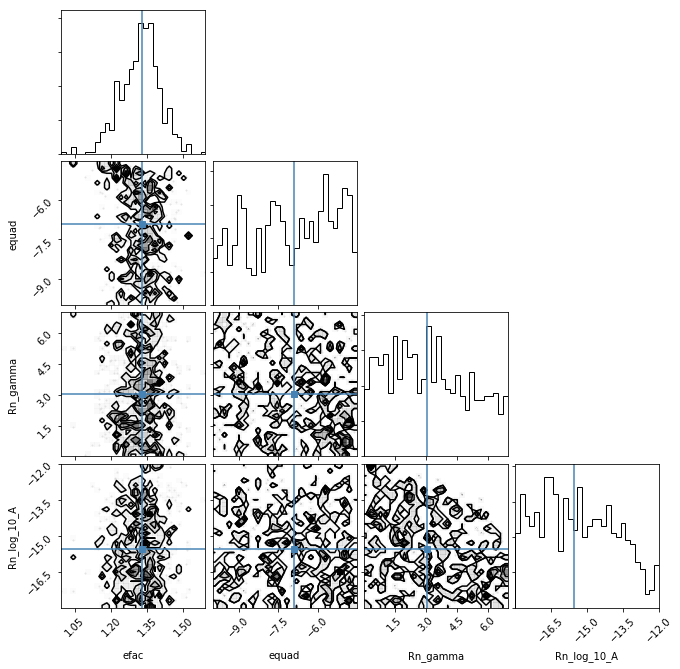

In [40]:
noise_params = ['efac','equad','Rn_gamma','Rn_log_10_A']
noise_idx = np.array(range(len(noise_params)))

#pulsar corner plot
corner.corner(chain_psr_1[burn_psr_1:,noise_idx], bins = 30, labels=noise_params, truths=truths)
plt.show()

In [30]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_histograms(data, labels, indices):
    n_cols = 4
    n_rows = int(len(labels)/n_cols)
    n_bins = 50
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(10,5))
    ii = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axarr[i][j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
            axarr[i][j].set_xlabel(labels[ii])
            ii += 1
    fig.tight_layout()
    plt.show()

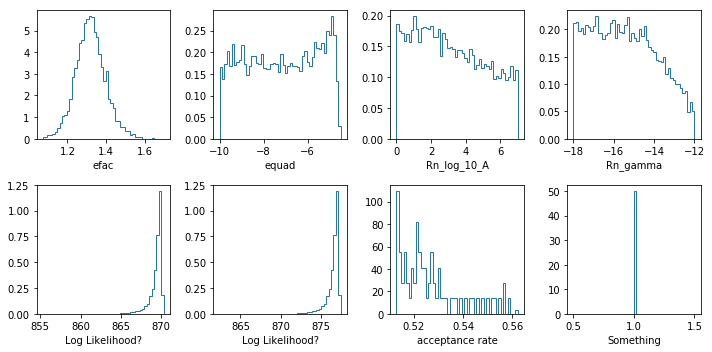

In [31]:
labels = ['efac','equad','Rn_log_10_A','Rn_gamma','Log Likelihood?','Log Likelihood?','acceptance rate','Something']
indices = np.array(range(len(labels)))
draw_histograms(chain_psr_1[burn_psr_1:,:], labels, indices)